In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("17-cardekho.csv")

In [3]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [28]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [7]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [8]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [9]:
df["seats"].value_counts()

seats
5    12910
7     1922
8      311
6      127
4       77
9       55
2        7
0        2
Name: count, dtype: int64

In [11]:
df[df.duplicated()]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
197,Honda City,Honda,City,8,70000,Individual,Petrol,Manual,16.80,1497,116.30,5,545000
360,Maruti Baleno,Maruti,Baleno,2,5000,Individual,Petrol,Automatic,21.40,1197,83.10,5,686000
1353,Maruti Swift Dzire,Maruti,Swift Dzire,4,50000,Individual,Diesel,Manual,28.40,1248,74.02,5,680000
1429,Maruti Wagon R,Maruti,Wagon R,13,100000,Individual,Petrol,Manual,18.90,1061,67.00,5,150000
1485,Hyundai i20,Hyundai,i20,3,50000,Individual,Petrol,Manual,18.60,1197,81.83,5,625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15229,Maruti Swift,Maruti,Swift,8,80000,Individual,Diesel,Manual,22.90,1248,74.00,5,350000
15324,Maruti Wagon R,Maruti,Wagon R,6,50000,Individual,CNG,Manual,26.60,998,58.16,5,450000
15367,Tata Tiago,Tata,Tiago,4,30000,Individual,Petrol,Manual,23.84,1199,84.00,5,350000
15378,Hyundai Grand,Hyundai,Grand,6,30000,Individual,Petrol,Manual,18.90,1197,82.00,5,450000


In [12]:
df.shape

(15411, 13)

In [13]:
df = df.drop_duplicates(keep="first", ignore_index=True)

In [14]:
df.shape

(15244, 13)

In [15]:
df[df.duplicated()]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


In [16]:
df[df["seats"] == 0]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
3207,Honda City,Honda,City,18,40000,Individual,Petrol,Manual,13.00,1493,100.00,0,115000
12504,Nissan Kicks,Nissan,Kicks,2,10000,Individual,Diesel,Manual,19.39,1461,108.49,0,1154000


In [17]:
df.loc[df["seats"] == 0, "seats"] = 5

In [18]:
df[df["seats"] == 0]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


In [19]:
df["seats"].value_counts()

seats
5    12769
7     1902
8      310
6      125
4       76
9       55
2        7
Name: count, dtype: int64

In [22]:
for col in df.columns:
    print(df[col].unique())

['Maruti Alto' 'Hyundai Grand' 'Hyundai i20' 'Ford Ecosport'
 'Maruti Wagon R' 'Hyundai i10' 'Hyundai Venue' 'Maruti Swift'
 'Hyundai Verna' 'Renault Duster' 'Mini Cooper' 'Maruti Ciaz'
 'Mercedes-Benz C-Class' 'Toyota Innova' 'Maruti Baleno'
 'Maruti Swift Dzire' 'Volkswagen Vento' 'Hyundai Creta' 'Honda City'
 'Mahindra Bolero' 'Toyota Fortuner' 'Renault KWID' 'Honda Amaze'
 'Hyundai Santro' 'Mahindra XUV500' 'Mahindra KUV100' 'Maruti Ignis'
 'Datsun RediGO' 'Mahindra Scorpio' 'Mahindra Marazzo' 'Ford Aspire'
 'Ford Figo' 'Maruti Vitara' 'Tata Tiago' 'Volkswagen Polo' 'Kia Seltos'
 'Maruti Celerio' 'Datsun GO' 'BMW 5' 'Honda CR-V' 'Ford Endeavour'
 'Mahindra KUV' 'Honda Jazz' 'BMW 3' 'Audi A4' 'Tata Tigor'
 'Maruti Ertiga' 'Tata Safari' 'Mahindra Thar' 'Tata Hexa'
 'Land Rover Rover' 'Maruti Eeco' 'Audi A6' 'Mercedes-Benz E-Class'
 'Audi Q7' 'BMW Z4' 'BMW 6' 'Jaguar XF' 'BMW X5' 'MG Hector' 'Honda Civic'
 'Isuzu D-Max' 'Porsche Cayenne' 'BMW X1' 'Skoda Rapid' 'Ford Freestyle'
 'Skoda

In [24]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15244.000000,1.524400e+04,15244.000000,15244.000000,15244.000000,15244.000000,1.524400e+04
mean,6.041131,5.563958e+04,19.697333,1486.171543,100.607652,5.326817,7.747014e+05
std,3.016228,5.176630e+04,4.169307,520.419390,42.915687,0.806464,8.946761e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,2.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.590000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [27]:
pd.set_option("display.float_format", "{:.2f}".format)
# bu gösterim yukarıda görülen km_driven kolonundaki "e+" ifadesinin götürülmesini sağlar.

In [26]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15244.00,15244.00,15244.00,15244.00,15244.00,15244.00,15244.00
mean,6.04,55639.58,19.70,1486.17,100.61,5.33,774701.45
std,3.02,51766.30,4.17,520.42,42.92,0.81,894676.08
min,0.00,100.00,4.00,793.00,38.40,2.00,40000.00
25%,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,6.00,50000.00,19.67,1248.00,88.50,5.00,559000.00
75%,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,29.00,3800000.00,33.54,6592.00,626.00,9.00,39500000.00


In [29]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


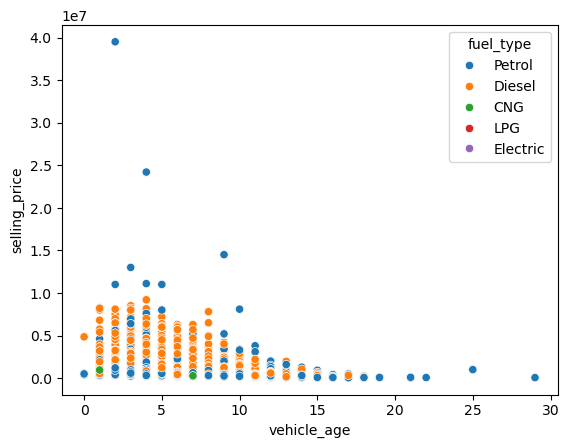

In [30]:
sns.scatterplot(x=df["vehicle_age"], y=df["selling_price"], hue=df["fuel_type"])
plt.show()

In [31]:
df["selling_price"].max()

39500000

In [34]:
df = df[(df["selling_price"] < 10000000)]

In [35]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15237.00,15237.00,15237.00,15237.00,15237.00,15237.00,15237.00
mean,6.04,55658.27,19.70,1484.68,100.43,5.33,766899.58
std,3.02,51770.12,4.16,515.17,42.06,0.81,789564.21
min,0.00,100.00,6.00,793.00,38.40,2.00,40000.00
25%,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,6.00,50000.00,19.67,1248.00,88.50,5.00,557000.00
75%,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,29.00,3800000.00,33.54,5998.00,600.00,9.00,9200000.00


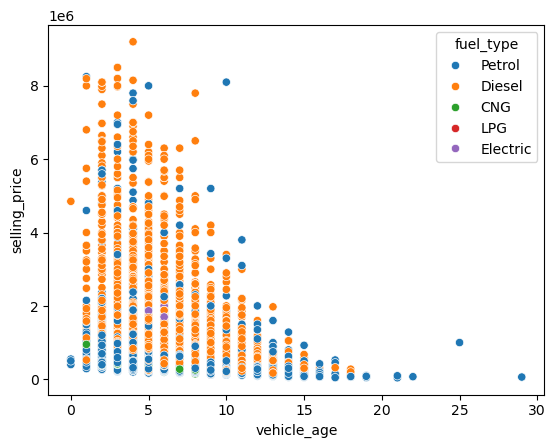

In [36]:
sns.scatterplot(x=df["vehicle_age"], y=df["selling_price"], hue=df["fuel_type"])
plt.show()

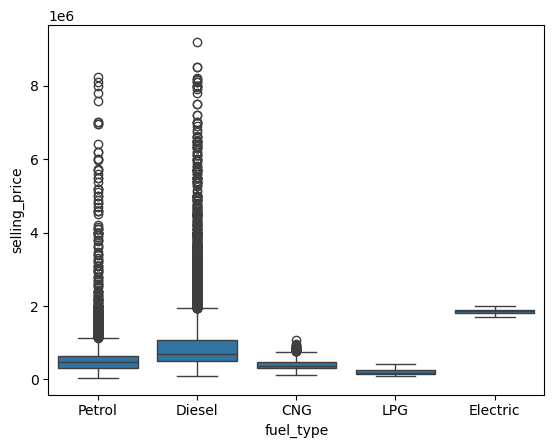

In [38]:
sns.boxplot(data=df, x="fuel_type", y="selling_price")
plt.show()

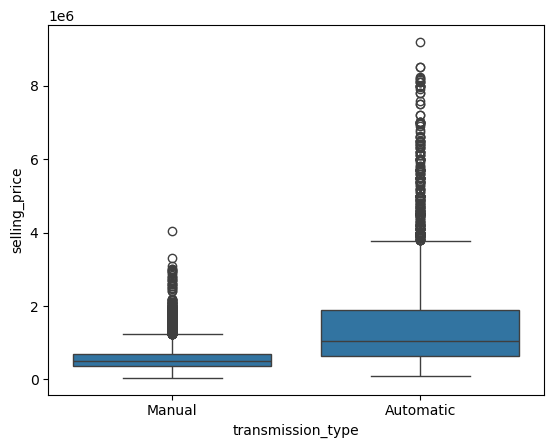

In [39]:
sns.boxplot(data=df, x="transmission_type", y="selling_price")
plt.show()

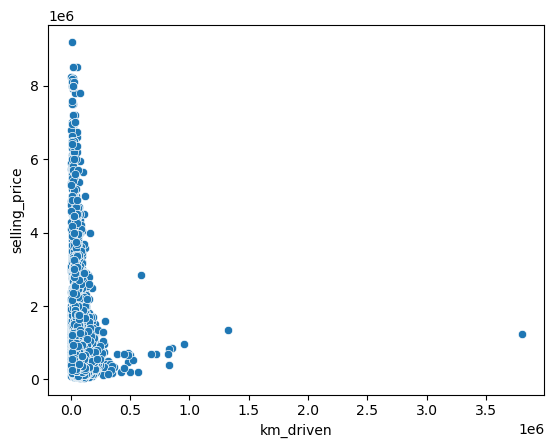

In [40]:
sns.scatterplot(x=df["km_driven"], y=df["selling_price"])
plt.show()

In [41]:
df["km_driven"].max()

3800000

In [45]:
df = df[(df["km_driven"] < 600000)]

In [46]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15228.00,15228.00,15228.00,15228.00,15228.00,15228.00,15228.00
mean,6.04,54982.27,19.70,1484.47,100.42,5.33,766852.11
std,3.02,37282.19,4.16,515.08,42.06,0.81,789765.69
min,0.00,100.00,6.00,793.00,38.40,2.00,40000.00
25%,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,6.00,50000.00,19.67,1248.00,88.50,5.00,556000.00
75%,8.00,70000.00,22.70,1582.00,117.30,5.00,822000.00
max,29.00,590000.00,33.54,5998.00,600.00,9.00,9200000.00


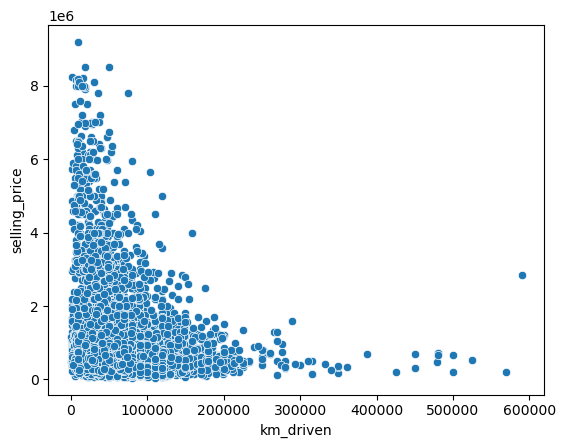

In [47]:
sns.scatterplot(x=df["km_driven"], y=df["selling_price"])
plt.show()

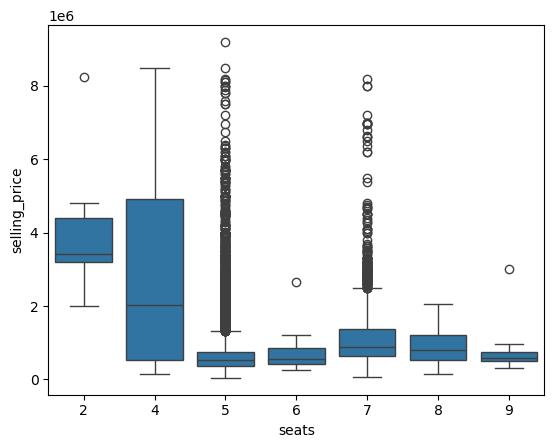

In [48]:
sns.boxplot(data=df, x="seats", y="selling_price")
plt.show()

In [50]:
df.corr(numeric_only=True)

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.00,0.46,-0.26,0.10,0.01,0.03,-0.27
km_driven,0.46,1.00,-0.14,0.26,0.06,0.25,-0.12
mileage,-0.26,-0.14,1.00,-0.63,-0.53,-0.44,-0.32
engine,0.10,0.26,-0.63,1.00,0.80,0.56,0.61
max_power,0.01,0.06,-0.53,0.80,1.00,0.18,0.77
seats,0.03,0.25,-0.44,0.56,0.18,1.00,0.14
selling_price,-0.27,-0.12,-0.32,0.61,0.77,0.14,1.00


In [52]:
X = df.drop("selling_price", axis=1)
y = df["selling_price"]

In [54]:
X.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [56]:
categorical = [col for col in df.columns if df[col].dtype == "O"]
numerical = [col for col in df.columns if df[col].dtype != "O"]

In [57]:
categorical

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [59]:
for col in categorical:
    print(df[col].nunique())

119
30
118
3
5
2


In [ ]:
# seller_type, fuel_type, transmission_type -> one hot encoding
# car_name, brand, model -> frequency encoding

In [60]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [61]:
onehot_columns = ["seller_type", "fuel_type", "transmission_type"]
freq_columns = ["car_name", "brand", "model"]

In [63]:
for col in freq_columns:
    freq = X_train[col].value_counts() / len(X_train)

    X_train[col + "_freq"] = X_train[col].map(freq)

    X_test[col + "_freq"] = X_test[col].map(freq)

    mean_freq = freq.mean()
    X_test[col + "_freq"] = X_test[col + "_freq"].fillna(mean_freq)

In [64]:
X_train.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,car_name_freq,brand_freq,model_freq
11120,Maruti Vitara,Maruti,Vitara,4,61000,Dealer,Diesel,Manual,24.30,1248,88.50,5,0.02,0.32,0.02
10922,Maruti Baleno,Maruti,Baleno,3,21000,Dealer,Petrol,Manual,21.40,1197,83.10,5,0.02,0.32,0.02
2937,Mercedes-Benz E-Class,Mercedes-Benz,E-Class,7,40000,Individual,Diesel,Automatic,13.00,2143,204.00,5,0.01,0.02,0.01
6964,Honda City,Honda,City,9,55000,Dealer,Petrol,Manual,16.80,1497,116.30,5,0.05,0.10,0.05
832,Maruti Alto,Maruti,Alto,5,30000,Individual,Petrol,Manual,22.74,796,47.30,5,0.05,0.32,0.05


In [65]:
X_test.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,car_name_freq,brand_freq,model_freq
5729,Volkswagen Vento,Volkswagen,Vento,10,72000,Dealer,Diesel,Manual,20.54,1598,103.60,5,0.02,0.04,0.02
10114,Maruti Vitara,Maruti,Vitara,4,62000,Dealer,Diesel,Manual,24.30,1248,88.50,5,0.02,0.32,0.02
5007,Maruti Alto,Maruti,Alto,7,45075,Dealer,Petrol,Manual,22.74,796,47.30,5,0.05,0.32,0.05
5784,Renault KWID,Renault,KWID,4,22017,Dealer,Petrol,Manual,23.01,999,67.00,5,0.02,0.04,0.02
10066,Hyundai Verna,Hyundai,Verna,8,58000,Dealer,Diesel,Manual,22.32,1582,126.32,5,0.03,0.19,0.03


In [66]:
X_train = X_train.drop(["car_name", "brand", "model"], axis=1)
X_test = X_test.drop(["car_name", "brand", "model"], axis=1)

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [68]:
transformer = ColumnTransformer(
    transformers= [
        ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"), onehot_columns)
    ], remainder= "passthrough"
)

In [69]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [70]:
encoded_cols = transformer.get_feature_names_out() 

In [71]:
encoded_cols

array(['onehot__seller_type_Individual',
       'onehot__seller_type_Trustmark Dealer', 'onehot__fuel_type_Diesel',
       'onehot__fuel_type_Electric', 'onehot__fuel_type_LPG',
       'onehot__fuel_type_Petrol', 'onehot__transmission_type_Manual',
       'remainder__vehicle_age', 'remainder__km_driven',
       'remainder__mileage', 'remainder__engine', 'remainder__max_power',
       'remainder__seats', 'remainder__car_name_freq',
       'remainder__brand_freq', 'remainder__model_freq'], dtype=object)

In [73]:
X_train = pd.DataFrame(X_train, columns=encoded_cols)
X_test = pd.DataFrame(X_test, columns=encoded_cols)

In [74]:
X_train.head()

,onehot__seller_type_Individual,onehot__seller_type_Trustmark Dealer,onehot__fuel_type_Diesel,onehot__fuel_type_Electric,onehot__fuel_type_LPG,onehot__fuel_type_Petrol,onehot__transmission_type_Manual,remainder__vehicle_age,remainder__km_driven,remainder__mileage,remainder__engine,remainder__max_power,remainder__seats,remainder__car_name_freq,remainder__brand_freq,remainder__model_freq
0,0.00,0.00,1.00,0.00,0.00,0.00,1.00,4.00,61000.00,24.30,1248.00,88.50,5.00,0.02,0.32,0.02
1,0.00,0.00,0.00,0.00,0.00,1.00,1.00,3.00,21000.00,21.40,1197.00,83.10,5.00,0.02,0.32,0.02
2,1.00,0.00,1.00,0.00,0.00,0.00,0.00,7.00,40000.00,13.00,2143.00,204.00,5.00,0.01,0.02,0.01
3,0.00,0.00,0.00,0.00,0.00,1.00,1.00,9.00,55000.00,16.80,1497.00,116.30,5.00,0.05,0.10,0.05
4,1.00,0.00,0.00,0.00,0.00,1.00,1.00,5.00,30000.00,22.74,796.00,47.30,5.00,0.05,0.32,0.05


In [75]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [76]:
model = AdaBoostRegressor()

In [77]:
model.fit(X_train, y_train)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,loss,'linear'
,random_state,None


In [78]:
y_pred = model.predict(X_test)

In [79]:
print("r2 score: ", r2_score(y_pred, y_test))
print("mean squarred error: ", mean_squared_error(y_pred, y_test))
print("mean absolute error: ", mean_absolute_error(y_pred, y_test))

r2 score:  0.7054965765788339
mean squarred error:  163109294214.61435
mean absolute error:  303154.4302967094


In [80]:
params = {
    "n_estimators" : [50, 80, 100, 120],
    "learning_rate" : [0.001, 0.01, 0.1, 1.0, 2.0],
    "loss" : ["linear", "square", "exponential"]
}

In [81]:
rcv = RandomizedSearchCV(estimator=AdaBoostRegressor(), param_distributions=params, scoring="r2", cv=5, n_jobs=-1)

In [82]:
rcv.fit(X_train, y_train)

,estimator,AdaBoostRegressor()
,param_distributions,"{'learning_rate': [0.001, 0.01, ...], 'loss': ['linear', 'square', ...], 'n_estimators': [50, 80, ...]}"
,n_iter,10
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [83]:
y_pred = rcv.predict(X_test)

In [84]:
print("r2 score: ", r2_score(y_pred, y_test))
print("mean squarred error: ", mean_squared_error(y_pred, y_test))
print("mean absolute error: ", mean_absolute_error(y_pred, y_test))

r2 score:  0.7765059956427092
mean squarred error:  120926628799.2793
mean absolute error:  216783.1723953369


In [ ]:
#
params = {
    "estimator__max_depth" : [3,4,5],
    "n_estimators" : [50, 80, 100, 120],
    "learning_rate" : [0.001, 0.01, 0.1, 1.0, 2.0],
    "loss" : ["linear", "square", "exponential"]
}

In [85]:
rcv = RandomizedSearchCV(estimator=AdaBoostRegressor(DecisionTreeRegressor()), param_distributions=params, scoring="r2", cv=5, n_jobs=-1)

In [86]:
rcv.fit(X_train, y_train)

,estimator,AdaBoostRegre...eeRegressor())
,param_distributions,"{'learning_rate': [0.001, 0.01, ...], 'loss': ['linear', 'square', ...], 'n_estimators': [50, 80, ...]}"
,n_iter,10
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [88]:
rcv.best_params_

{'n_estimators': 120, 'loss': 'square', 'learning_rate': 1.0}

In [89]:
y_pred = rcv.predict(X_test)
print("r2 score: ", r2_score(y_pred, y_test))
print("mean squarred error: ", mean_squared_error(y_pred, y_test))
print("mean absolute error: ", mean_absolute_error(y_pred, y_test))

r2 score:  0.9182544075874218
mean squarred error:  50708343883.50981
mean absolute error:  107378.49688612984
